In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cells=pd.read_csv('event000001000-cells.csv')
hits=pd.read_csv('event000001000-hits.csv')
particles=pd.read_csv('event000001000-particles.csv')
truths=pd.read_csv('event000001000-truth.csv')

In [11]:
hits.head(1)

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.4099,-7.1637,-1502.5,7,2,1


In [65]:
#Restrict region
import seaborn as sns
def plot3d(df,st):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Replace 'x', 'y', 'z', and 'label' with the actual column names in your DataFrame
    x = df['x']
    y = df['y']
    z = df['z']
    label = df[st]

    scatter = ax.scatter(x, y, z, c=label, cmap='viridis')

    # Add a colorbar to show the mapping of labels to colors
    colorbar = plt.colorbar(scatter)
    colorbar.set_label('Label')

    # Set labels for the axes
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    # Show the plot
    plt.show()
def plot2d(df,st):
    # Replace 'x', 'y', and 'label' with the actual column names in your DataFrame
    x = df['x']
    y = df['y']
    labels = df[st]

    # Create a scatter plot with colors based on the 'label' column
    plt.scatter(x, y, c=labels, cmap='viridis')

    # Add a colorbar to show the mapping of labels to colors
    colorbar = plt.colorbar()
    colorbar.set_label('Label')

    # Set labels for the axes
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Show the plot
    plt.show()

In [56]:
# Assuming you already have a DataFrame 'df' with columns 'x', 'y', 'z', and 'label'
filtered_df = hits[(hits['z'] > 0)]
# Calculate Euclidean distance for each filtered data point
filtered_df['distance_to_origin'] = np.sqrt(filtered_df['x']**2 + filtered_df['y']**2 + filtered_df['z']**2)

<ipython-input-56-6f4fcb93e939>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['distance_to_origin'] = np.sqrt(filtered_df['x']**2 + filtered_df['y']**2 + filtered_df['z']**2)


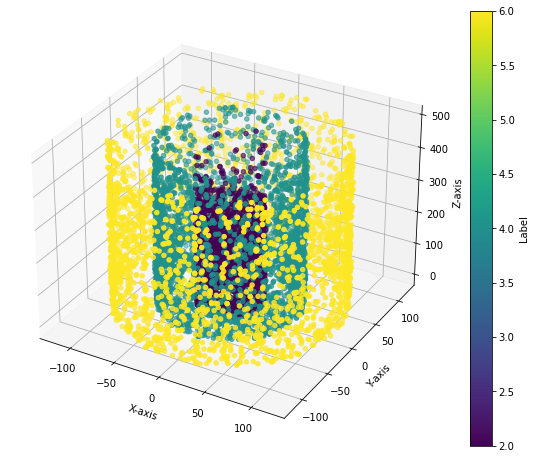

In [57]:
df = filtered_df[(filtered_df['volume_id']==8) & (filtered_df['layer_id']<8)]
plot3d(df,'layer_id')
#Too many points

In [58]:
df1=df[['hit_id','x','y','z','volume_id','layer_id']]
df1.head(3)

,hit_id,x,y,z,volume_id,layer_id
19227,19228,-29.1320,-13.43710,0.296871,8,2
19238,19239,-31.8899,-5.54926,0.919046,8,2
19242,19243,-30.7640,-8.76942,0.071873,8,2


In [59]:
truths.head(1)

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,tpxy
0,1,0,-64.4116,-7.16412,-1502.5,250710.0,-149908.0,-956385.0,0.0,292109.418821


In [60]:
#Compute transverse momentum to impose cut later
truths['tpxy'] = np.sqrt(truths['tpx']**2+truths['tpy']**2)
truths.head(1)

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,tpxy
0,1,0,-64.4116,-7.16412,-1502.5,250710.0,-149908.0,-956385.0,0.0,292109.418821


In [63]:
# Merge the DataFrames based on the shared feature
merged_df = pd.merge(df1, truths, on='hit_id', how='inner')
merged_df=merged_df[merged_df['tpxy']<0.15]
merged_df.shape

(51, 15)

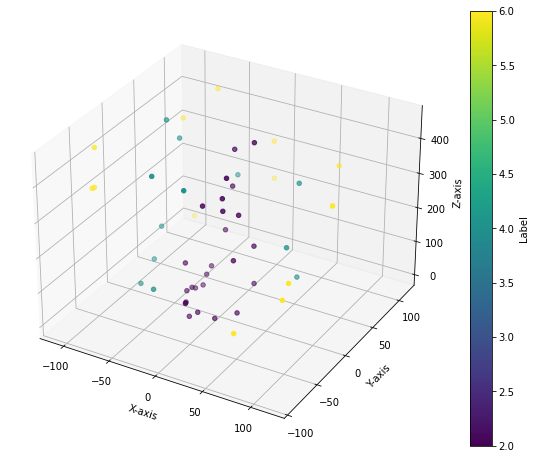

In [64]:
plot3d(merged_df,'layer_id')

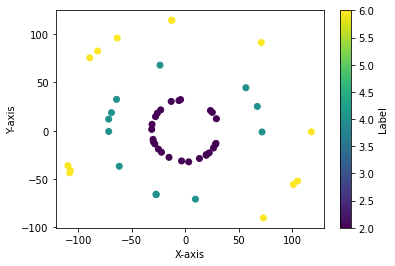

In [67]:
#Projected on x-y plane
plot2d(merged_df,'layer_id')

In [8]:
particles.head(1)

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
